# importing libaries 

In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Reading data

In [5]:
df_bu = pd.read_csv('business.csv')
df_bu.head()

,date,airline,ch_code,num_code,dep_time,from,time_taken,stop,arr_time,to,price
0,11-02-2022,Air India,AI,868,18:00,Delhi,02h 00m,non-stop,20:00,Mumbai,"25,612"
1,11-02-2022,Air India,AI,624,19:00,Delhi,02h 15m,non-stop,21:15,Mumbai,"25,612"
2,11-02-2022,Air India,AI,531,20:00,Delhi,24h 45m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,20:45,Mumbai,"42,220"
3,11-02-2022,Air India,AI,839,21:25,Delhi,26h 30m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,23:55,Mumbai,"44,450"
4,11-02-2022,Air India,AI,544,17:15,Delhi,06h 40m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,23:55,Mumbai,"46,690"


In [6]:
df_bu.shape

(93487, 11)

In [7]:
df_bu.columns # Attributes

Index(['date', 'airline', 'ch_code', 'num_code', 'dep_time', 'from',
       'time_taken', 'stop', 'arr_time', 'to', 'price'],
      dtype='object')

#### Adding a classifier based on the class of the flight (Feature Eng)

In [8]:
df_bu['class'] = 'business'
df_bu.head()

,date,airline,ch_code,num_code,dep_time,from,time_taken,stop,arr_time,to,price,class
0,11-02-2022,Air India,AI,868,18:00,Delhi,02h 00m,non-stop,20:00,Mumbai,"25,612",business
1,11-02-2022,Air India,AI,624,19:00,Delhi,02h 15m,non-stop,21:15,Mumbai,"25,612",business
2,11-02-2022,Air India,AI,531,20:00,Delhi,24h 45m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,20:45,Mumbai,"42,220",business
3,11-02-2022,Air India,AI,839,21:25,Delhi,26h 30m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,23:55,Mumbai,"44,450",business
4,11-02-2022,Air India,AI,544,17:15,Delhi,06h 40m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,23:55,Mumbai,"46,690",business


##### Reading data

In [9]:
df_ec = pd.read_csv('economy.csv')
df_ec.head()

,date,airline,ch_code,num_code,dep_time,from,time_taken,stop,arr_time,to,price
0,11-02-2022,SpiceJet,SG,8709,18:55,Delhi,02h 10m,non-stop,21:05,Mumbai,"5,953"
1,11-02-2022,SpiceJet,SG,8157,06:20,Delhi,02h 20m,non-stop,08:40,Mumbai,"5,953"
2,11-02-2022,AirAsia,I5,764,04:25,Delhi,02h 10m,non-stop,06:35,Mumbai,"5,956"
3,11-02-2022,Vistara,UK,995,10:20,Delhi,02h 15m,non-stop,12:35,Mumbai,"5,955"
4,11-02-2022,Vistara,UK,963,08:50,Delhi,02h 20m,non-stop,11:10,Mumbai,"5,955"


In [10]:
df_ec.shape

(206774, 11)

In [11]:
df_ec.columns

Index(['date', 'airline', 'ch_code', 'num_code', 'dep_time', 'from',
       'time_taken', 'stop', 'arr_time', 'to', 'price'],
      dtype='object')

In [12]:
df_ec['class'] = 'economy' # Feature Eng.
df_ec.head()

,date,airline,ch_code,num_code,dep_time,from,time_taken,stop,arr_time,to,price,class
0,11-02-2022,SpiceJet,SG,8709,18:55,Delhi,02h 10m,non-stop,21:05,Mumbai,"5,953",economy
1,11-02-2022,SpiceJet,SG,8157,06:20,Delhi,02h 20m,non-stop,08:40,Mumbai,"5,953",economy
2,11-02-2022,AirAsia,I5,764,04:25,Delhi,02h 10m,non-stop,06:35,Mumbai,"5,956",economy
3,11-02-2022,Vistara,UK,995,10:20,Delhi,02h 15m,non-stop,12:35,Mumbai,"5,955",economy
4,11-02-2022,Vistara,UK,963,08:50,Delhi,02h 20m,non-stop,11:10,Mumbai,"5,955",economy


## combining data

In [13]:
df = pd.concat([df_ec, df_bu], axis=0, ignore_index=True) # axis=0(row), axis=1(column)
df.shape

(300261, 12)

In [14]:
df.sample()

,date,airline,ch_code,num_code,dep_time,from,time_taken,stop,arr_time,to,price,class
26229,18-03-2022,AirAsia,I5,740,08:00,Delhi,11h 45m,2+-stop,19:45,Kolkata,"2,480",economy


In [15]:
df.shape

(300261, 12)

#### checking if there is any missing value (Data cleaning)

In [16]:

df.isna().sum()

date          0
airline       0
ch_code       0
num_code      0
dep_time      0
from          0
time_taken    0
stop          0
arr_time      0
to            0
price         0
class         0
dtype: int64

#### Check if there is any duplicates in the data (Data cleaning)

In [17]:
df.duplicated().sum()

2

##### drop all the duplicate data (Data cleaning)

In [18]:
df.drop_duplicates(inplace=True, keep='first')

In [19]:
df.duplicated().sum()

0

In [20]:
df.shape

(300259, 12)

In [21]:
df.columns

Index(['date', 'airline', 'ch_code', 'num_code', 'dep_time', 'from',
       'time_taken', 'stop', 'arr_time', 'to', 'price', 'class'],
      dtype='object')

## data exploration

In [22]:
df.dtypes

date          object
airline       object
ch_code       object
num_code       int64
dep_time      object
from          object
time_taken    object
stop          object
arr_time      object
to            object
price         object
class         object
dtype: object

In [23]:
df.sample() # AI-441

,date,airline,ch_code,num_code,dep_time,from,time_taken,stop,arr_time,to,price,class
78743,22-02-2022,Vistara,UK,958,12:25,Mumbai,10h 20m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,22:45,Chennai,"11,129",economy


### # create new feature 'flight_code' (Feature Eng)

In [24]:

df['num_code'] = df['num_code'].astype('str')
df.dtypes

date          object
airline       object
ch_code       object
num_code      object
dep_time      object
from          object
time_taken    object
stop          object
arr_time      object
to            object
price         object
class         object
dtype: object

In [25]:
df['flight_code'] = df['ch_code'] + '-' + df['num_code']
df.head(1)

,date,airline,ch_code,num_code,dep_time,from,time_taken,stop,arr_time,to,price,class,flight_code
0,11-02-2022,SpiceJet,SG,8709,18:55,Delhi,02h 10m,non-stop,21:05,Mumbai,"5,953",economy,SG-8709


In [26]:
df.drop(['ch_code', 'num_code'], inplace=True, axis=1)
df.head(1)

,date,airline,dep_time,from,time_taken,stop,arr_time,to,price,class,flight_code
0,11-02-2022,SpiceJet,18:55,Delhi,02h 10m,non-stop,21:05,Mumbai,"5,953",economy,SG-8709


### change the columns names (Data Organization and Data Integration)

In [27]:
df.columns = ['date', 'airline', 'departure_time', 'source_city', 'duration', 'stops', 'arrival_time',
              'destination_city', 'price', 'class', 'flight_code']
df.head(5)

,date,airline,departure_time,source_city,duration,stops,arrival_time,destination_city,price,class,flight_code
0,11-02-2022,SpiceJet,18:55,Delhi,02h 10m,non-stop,21:05,Mumbai,"5,953",economy,SG-8709
1,11-02-2022,SpiceJet,06:20,Delhi,02h 20m,non-stop,08:40,Mumbai,"5,953",economy,SG-8157
2,11-02-2022,AirAsia,04:25,Delhi,02h 10m,non-stop,06:35,Mumbai,"5,956",economy,I5-764
3,11-02-2022,Vistara,10:20,Delhi,02h 15m,non-stop,12:35,Mumbai,"5,955",economy,UK-995
4,11-02-2022,Vistara,08:50,Delhi,02h 20m,non-stop,11:10,Mumbai,"5,955",economy,UK-963


### Changing the duration in order to make it more readable and better for analyzing

In [28]:
## split the duration data into two columns hours and minutes 
temp = pd.DataFrame()
temp[['hours', 'minutes']] = df['duration'].str.split(expand=True)
temp.head()

,hours,minutes
0,02h,10m
1,02h,20m
2,02h,10m
3,02h,15m
4,02h,20m


In [29]:
## using the regular expression libary remove any non numerical charecters and replace it with ''
import re
temp['hours'] = temp['hours'].apply(lambda x: re.sub('[^0-9]', '', x))
temp['minutes'] = temp['minutes'].apply(lambda x: re.sub('[^0-9]', '', x))
temp.head()

,hours,minutes
0,02,10
1,02,20
2,02,10
3,02,15
4,02,20


In [30]:
temp['minutes'].value_counts()

minutes
10    30327
15    27950
05    26538
00    25605
30    25038
20    24760
55    24661
45    23670
50    23330
25    23064
35    22711
40    22566
59       15
24       15
04        5
          4
Name: count, dtype: int64

In [31]:
## replace any '' to '00'
temp['minutes'] = temp['minutes'].replace('','00')
temp['minutes'].value_counts()

minutes
10    30327
15    27950
05    26538
00    25609
30    25038
20    24760
55    24661
45    23670
50    23330
25    23064
35    22711
40    22566
59       15
24       15
04        5
Name: count, dtype: int64

In [32]:
# decimal
temp.dtypes

hours      object
minutes    object
dtype: object

In [33]:
# change the datatype for hours and minutes from object to int to make it fit in the model
temp['hours'] = temp['hours'].astype(int)
temp['minutes'] = temp['minutes'].astype('int')
temp.dtypes

hours      int32
minutes    int32
dtype: object

In [34]:
temp['duration'] = np.round(((temp['hours']*60 + temp['minutes'])/60),2)
temp.head()

,hours,minutes,duration
0,2,10,2.17
1,2,20,2.33
2,2,10,2.17
3,2,15,2.25
4,2,20,2.33


In [35]:
df['duration'] = temp['duration']
df.head()

,date,airline,departure_time,source_city,duration,stops,arrival_time,destination_city,price,class,flight_code
0,11-02-2022,SpiceJet,18:55,Delhi,2.17,non-stop,21:05,Mumbai,"5,953",economy,SG-8709
1,11-02-2022,SpiceJet,06:20,Delhi,2.33,non-stop,08:40,Mumbai,"5,953",economy,SG-8157
2,11-02-2022,AirAsia,04:25,Delhi,2.17,non-stop,06:35,Mumbai,"5,956",economy,I5-764
3,11-02-2022,Vistara,10:20,Delhi,2.25,non-stop,12:35,Mumbai,"5,955",economy,UK-995
4,11-02-2022,Vistara,08:50,Delhi,2.33,non-stop,11:10,Mumbai,"5,955",economy,UK-963


In [36]:
df.columns

Index(['date', 'airline', 'departure_time', 'source_city', 'duration', 'stops',
       'arrival_time', 'destination_city', 'price', 'class', 'flight_code'],
      dtype='object')

In [37]:
# Stops
len(df['stops'].unique())

40

In [38]:
df['stops'].value_counts()

stops
1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t\t\t\t\t\t\t                      243601
non-stop                                                                         36044
2+-stop                                                                          13288
1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia IXU\n\t\t\t\t\t\t\t\t\t\t\t\t                 1839
1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia IDR\n\t\t\t\t\t\t\t\t\t\t\t\t                 1398
1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia Patna\n\t\t\t\t\t\t\t\t\t\t\t\t                674
1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia Indore\n\t\t\t\t\t\t\t\t\t\t\t\t               381
1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia PAT\n\t\t\t\t\t\t\t\t\t\t\t\t                  354
1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia MYQ\n\t\t\t\t\t\t\t\t\t\t\t\t                  321
1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia Bhubaneswar\n\t\t\t\t\t\t\t\t\t\t\t\t          301
1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia KLH\n\t\t\t\t\t\t\t\t\t\t\t\t                  284
1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia J

In [39]:
def clean_stop(x):
  if(x[0] == '1'):
    return x[0]
  elif(x[0] == '2'):
    return x[0]
  else:
    return '0'

df['stops'] = df['stops'].apply(clean_stop)

In [40]:
df['stops'].value_counts()

stops
1    250927
0     36044
2     13288
Name: count, dtype: int64

In [41]:
df['stops'].unique()

array(['0', '1', '2'], dtype=object)

In [42]:
df['stops'] = df['stops'].astype(int)

In [43]:
df.head(1)

,date,airline,departure_time,source_city,duration,stops,arrival_time,destination_city,price,class,flight_code
0,11-02-2022,SpiceJet,18:55,Delhi,2.17,0,21:05,Mumbai,"5,953",economy,SG-8709


<h3>Dimentionality Reduction<h3>

In [44]:
# departure_time
df['departure_time']

0         18:55
1         06:20
2         04:25
3         10:20
4         08:50
          ...  
300256    09:45
300257    12:30
300258    07:05
300259    07:00
300260    09:45
Name: departure_time, Length: 300259, dtype: object

In [45]:
temp = pd.DataFrame()
temp[['hours', 'minutes']] = df['departure_time'].str.split(':', expand=True)
temp.head()

,hours,minutes
0,18,55
1,06,20
2,04,25
3,10,20
4,08,50


In [46]:
temp['hours'] = temp['hours'].astype(int)
temp['hours'].describe()

count    300259.000000
mean         12.983518
std           5.363199
min           0.000000
25%           8.000000
50%          12.000000
75%          18.000000
max          23.000000
Name: hours, dtype: float64

In [47]:
temp['dep_time'] = pd.cut(x=temp['hours'], bins=6, labels=['Late Night', 'Early Morning', 'Morning', 'Afternoon', 'Evening', 'Night'])
temp.head()

,hours,minutes,dep_time
0,18,55,Evening
1,6,20,Early Morning
2,4,25,Early Morning
3,10,20,Morning
4,8,50,Morning


In [48]:
df['departure_time'] = temp['dep_time']
df.head()

,date,airline,departure_time,source_city,duration,stops,arrival_time,destination_city,price,class,flight_code
0,11-02-2022,SpiceJet,Evening,Delhi,2.17,0,21:05,Mumbai,"5,953",economy,SG-8709
1,11-02-2022,SpiceJet,Early Morning,Delhi,2.33,0,08:40,Mumbai,"5,953",economy,SG-8157
2,11-02-2022,AirAsia,Early Morning,Delhi,2.17,0,06:35,Mumbai,"5,956",economy,I5-764
3,11-02-2022,Vistara,Morning,Delhi,2.25,0,12:35,Mumbai,"5,955",economy,UK-995
4,11-02-2022,Vistara,Morning,Delhi,2.33,0,11:10,Mumbai,"5,955",economy,UK-963


In [49]:
# arrival_time
temp = pd.DataFrame()
temp[['hours', 'minutes']] = df['arrival_time'].str.split(':', expand=True)
temp.head()

,hours,minutes
0,21,05
1,08,40
2,06,35
3,12,35
4,11,10


In [50]:
temp['hours'] = temp['hours'].astype(int)
temp['hours'].describe()

count    300259.000000
mean         15.238967
std           6.050235
min           0.000000
25%          10.000000
50%          17.000000
75%          20.000000
max          23.000000
Name: hours, dtype: float64

In [51]:
temp['arr_time'] = pd.cut(x=temp['hours'], bins=6, labels=['Late Night', 'Early Morning', 'Morning', 'Afternoon', 'Evening', 'Night'])
temp.head()

,hours,minutes,arr_time
0,21,05,Night
1,8,40,Morning
2,6,35,Early Morning
3,12,35,Afternoon
4,11,10,Morning


In [52]:
df['arrival_time'] = temp['arr_time']
df.head()

,date,airline,departure_time,source_city,duration,stops,arrival_time,destination_city,price,class,flight_code
0,11-02-2022,SpiceJet,Evening,Delhi,2.17,0,Night,Mumbai,"5,953",economy,SG-8709
1,11-02-2022,SpiceJet,Early Morning,Delhi,2.33,0,Morning,Mumbai,"5,953",economy,SG-8157
2,11-02-2022,AirAsia,Early Morning,Delhi,2.17,0,Early Morning,Mumbai,"5,956",economy,I5-764
3,11-02-2022,Vistara,Morning,Delhi,2.25,0,Afternoon,Mumbai,"5,955",economy,UK-995
4,11-02-2022,Vistara,Morning,Delhi,2.33,0,Morning,Mumbai,"5,955",economy,UK-963


In [53]:
df.head(1)

,date,airline,departure_time,source_city,duration,stops,arrival_time,destination_city,price,class,flight_code
0,11-02-2022,SpiceJet,Evening,Delhi,2.17,0,Night,Mumbai,"5,953",economy,SG-8709


In [54]:
df['price'] = df['price'].apply(lambda x : re.sub('[^0-9]', '', x))

In [55]:
df['price'] = df['price'].astype(int)
df.head(1)

,date,airline,departure_time,source_city,duration,stops,arrival_time,destination_city,price,class,flight_code
0,11-02-2022,SpiceJet,Evening,Delhi,2.17,0,Night,Mumbai,5953,economy,SG-8709


<h3>Feature Eng.<h3>

In [56]:
# 10/02 booking date (Feb.=28 days) if month>2 (day + 18) else (day - 10)
# days_left
temp = pd.DataFrame()
temp[['day', 'month', 'year']] = df['date'].str.split('-', expand=True)
temp.head()

,day,month,year
0,11,02,2022
1,11,02,2022
2,11,02,2022
3,11,02,2022
4,11,02,2022


In [57]:
temp['day'] = temp['day'].astype(int)
temp['month'] = temp['month'].astype(int)

In [58]:
temp['days_left'] = np.where(temp['month']>2, temp['day'] + 18, temp['day'] - 10)
df['days_left'] = temp['days_left']

In [59]:
df.drop('date', axis=1, inplace=True)

In [60]:
df.head()

,airline,departure_time,source_city,duration,stops,arrival_time,destination_city,price,class,flight_code,days_left
0,SpiceJet,Evening,Delhi,2.17,0,Night,Mumbai,5953,economy,SG-8709,1
1,SpiceJet,Early Morning,Delhi,2.33,0,Morning,Mumbai,5953,economy,SG-8157,1
2,AirAsia,Early Morning,Delhi,2.17,0,Early Morning,Mumbai,5956,economy,I5-764,1
3,Vistara,Morning,Delhi,2.25,0,Afternoon,Mumbai,5955,economy,UK-995,1
4,Vistara,Morning,Delhi,2.33,0,Morning,Mumbai,5955,economy,UK-963,1


In [61]:
df.describe()

,duration,stops,price,days_left
count,300259.000000,300259.000000,300259.000000,300259.000000
mean,12.219091,0.924212,20883.800386,26.004529
std,7.200335,0.398189,22695.962230,13.560967
min,0.830000,0.000000,1105.000000,1.000000
25%,6.750000,1.000000,4783.000000,15.000000
50%,11.250000,1.000000,7425.000000,26.000000
75%,16.170000,1.000000,42521.000000,38.000000
max,103.000000,2.000000,123071.000000,49.000000


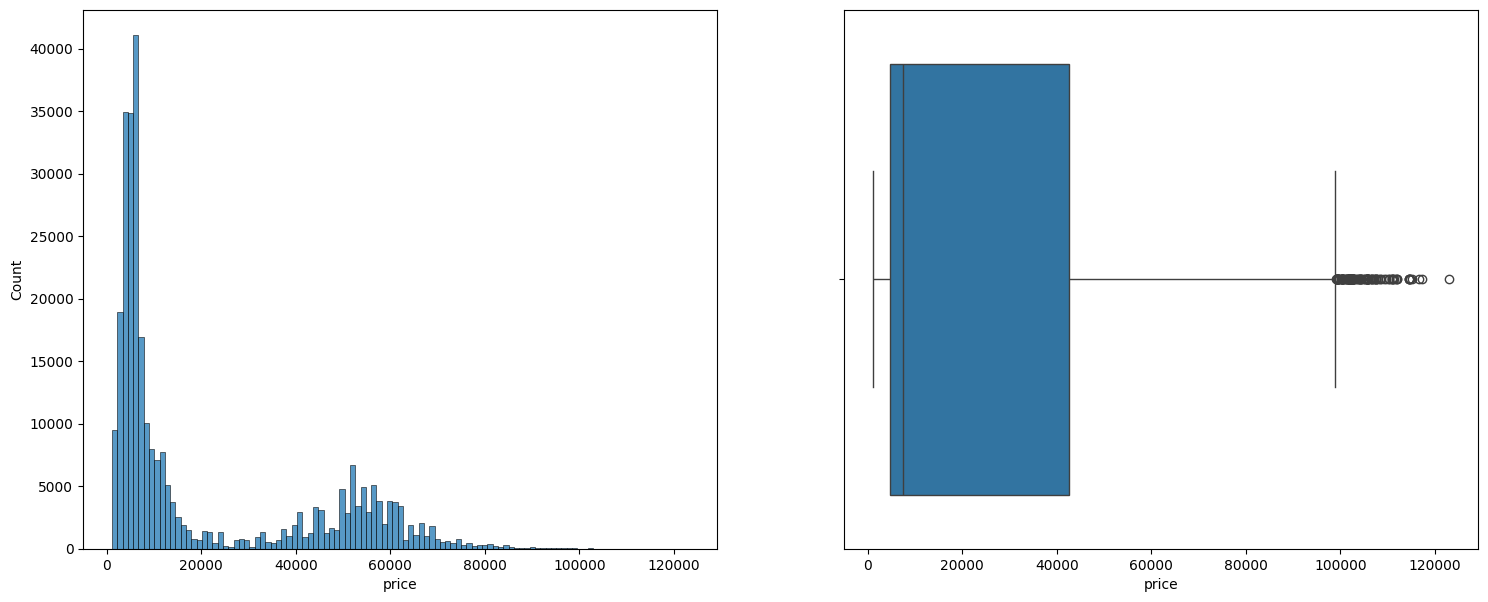

In [62]:
## checking the price count 
# class(ec, bu)
plt.figure(figsize=(18,7))
plt.subplot(1,2,1)
sns.histplot(data=df, x='price')
plt.subplot(1,2,2)
sns.boxplot(data=df, x='price')
plt.show()

In [63]:
df['price'].describe()

count    300259.000000
mean      20883.800386
std       22695.962230
min        1105.000000
25%        4783.000000
50%        7425.000000
75%       42521.000000
max      123071.000000
Name: price, dtype: float64

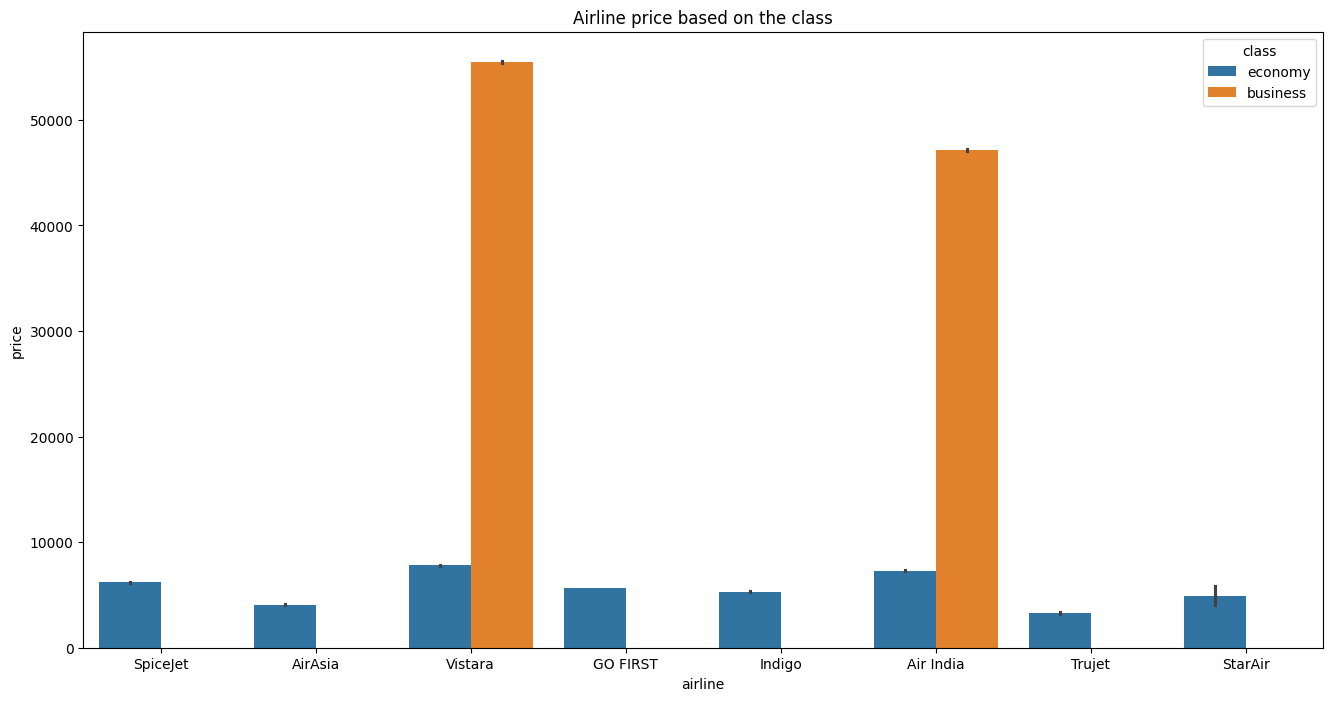

In [64]:
# Checking the airline price based on the class
plt.figure(figsize=(16,8))
sns.barplot(data=df, x='airline', y='price', hue='class')
plt.title('Airline price based on the class')
plt.show()

Business flights are only available in two companies:(Vistara, Air India)

In [65]:
# Days Left
temp = df.groupby('days_left', as_index=False)['price'].mean()
temp.head(1)

,days_left,price
0,1,21591.867151


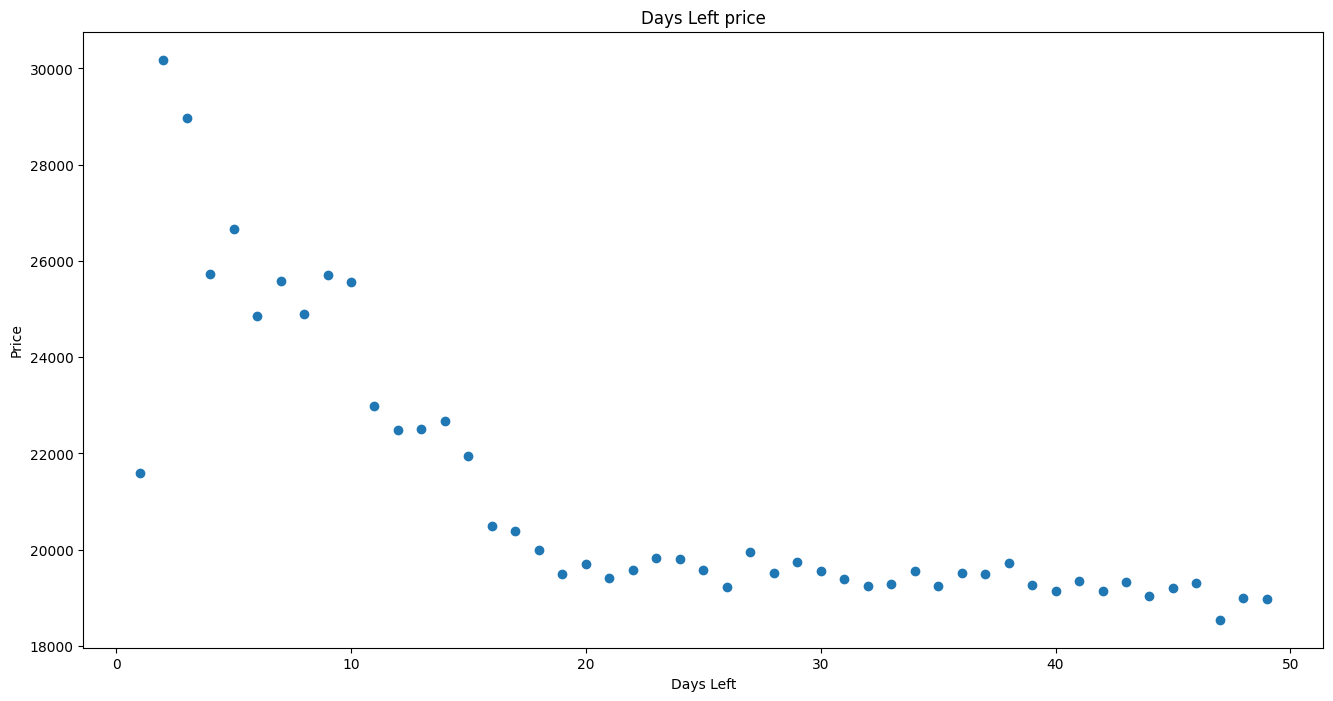

In [66]:
## checking the price based on how many days left for the flight
plt.figure(figsize=(16,8))
plt.scatter(data=temp, x='days_left', y='price')
plt.xlabel('Days Left')
plt.ylabel('Price')
plt.title('Days Left price')
plt.show()

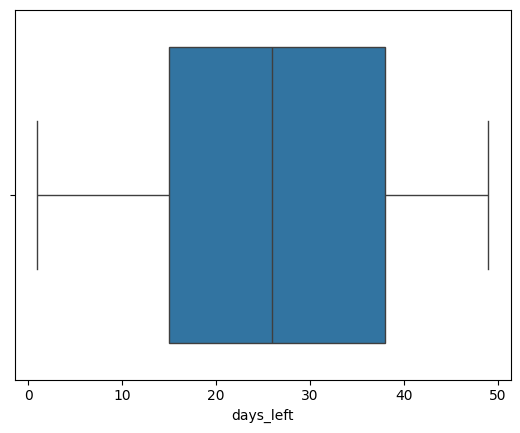

In [67]:
sns.boxplot(x=df['days_left'])
plt.show()

In [68]:
df['days_left'].describe()

count    300259.000000
mean         26.004529
std          13.560967
min           1.000000
25%          15.000000
50%          26.000000
75%          38.000000
max          49.000000
Name: days_left, dtype: float64

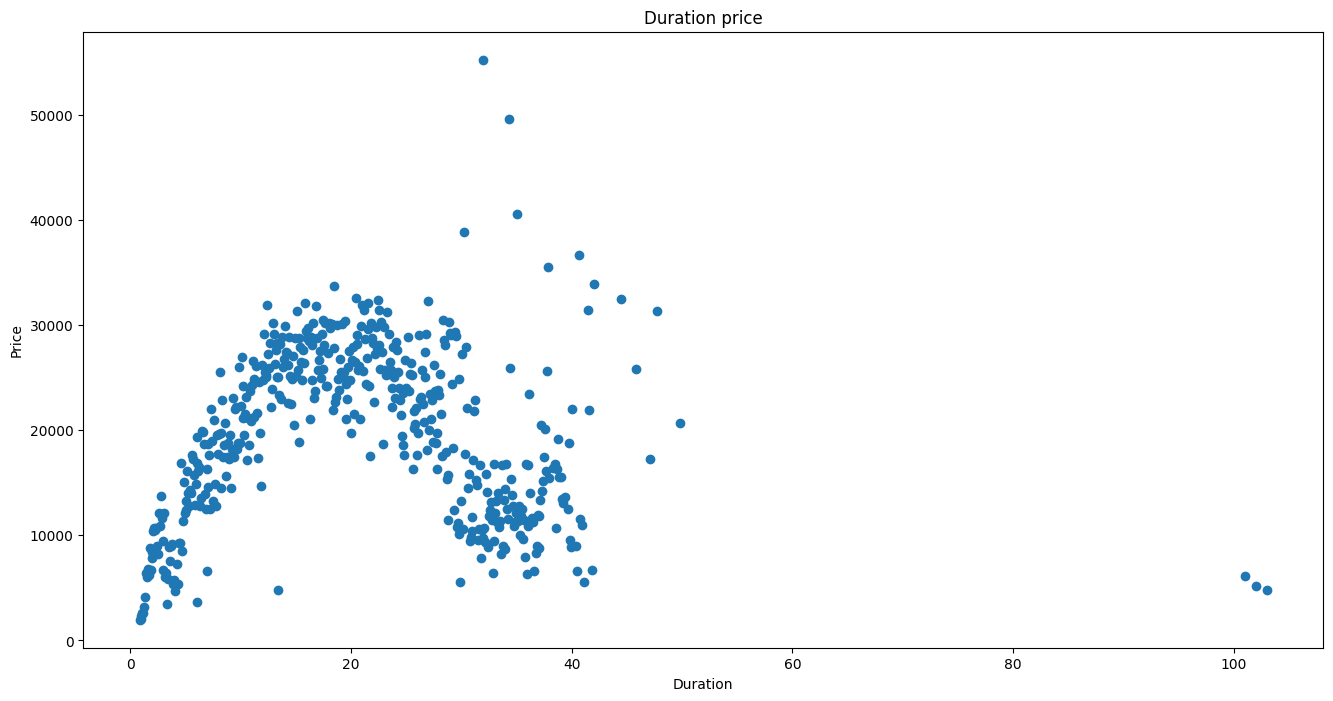

In [69]:
# checking the avrage(mean) price based on the flight Duration
temp = df.groupby('duration', as_index=False)['price'].mean()
plt.figure(figsize=(16,8))
plt.scatter(data=temp, x='duration', y='price')
plt.xlabel('Duration')
plt.ylabel('Price')
plt.title('Duration price')
plt.show()

In [70]:
## droping the extream data
print('duration featuer outlires:')
print(df[df['duration']>60].count())

duration featuer outlires:
airline             4
departure_time      4
source_city         4
duration            4
stops               4
arrival_time        4
destination_city    4
price               4
class               4
flight_code         4
days_left           4
dtype: int64


In [71]:
df.shape

(300259, 11)

In [72]:
df = df[df['duration']<60]
df.shape

(300255, 11)

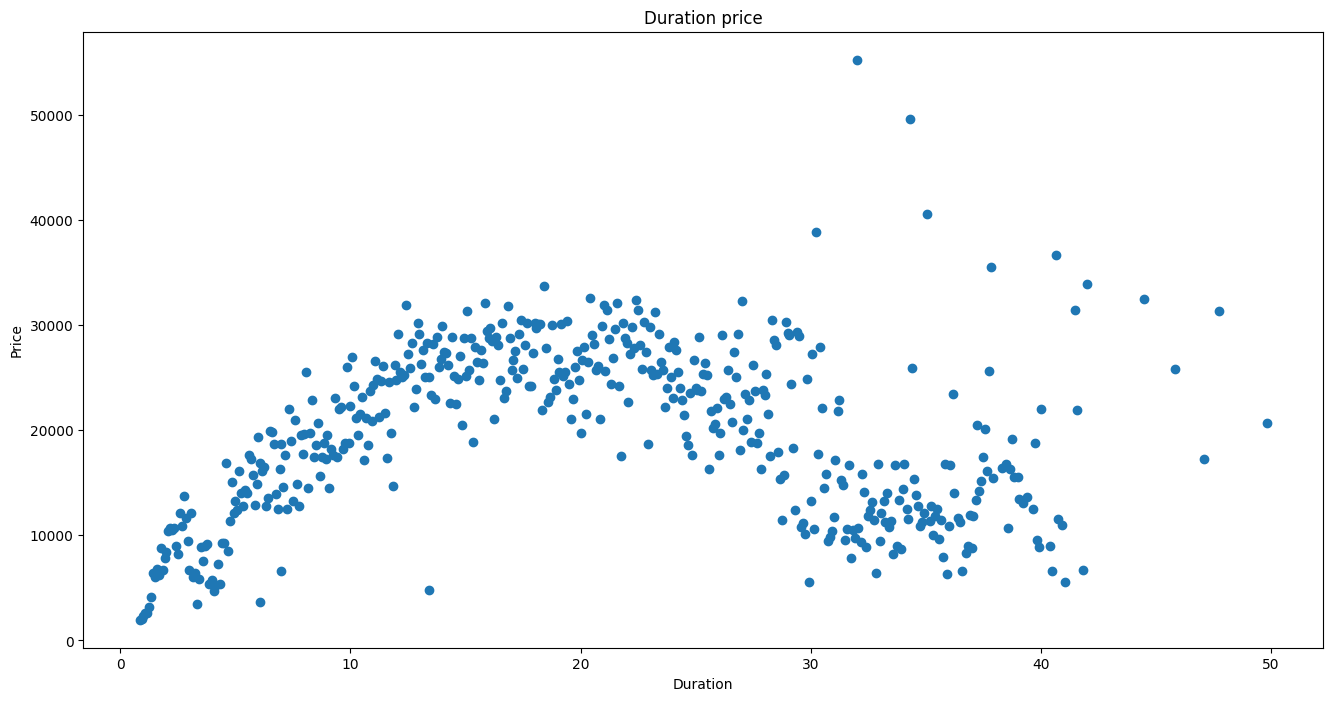

In [73]:
# checking the price based on duration 
temp = df.groupby('duration', as_index=False)['price'].mean()
plt.figure(figsize=(16,8))
plt.scatter(data=temp, x='duration', y='price')
plt.xlabel('Duration')
plt.ylabel('Price')
plt.title('Duration price')
plt.show()

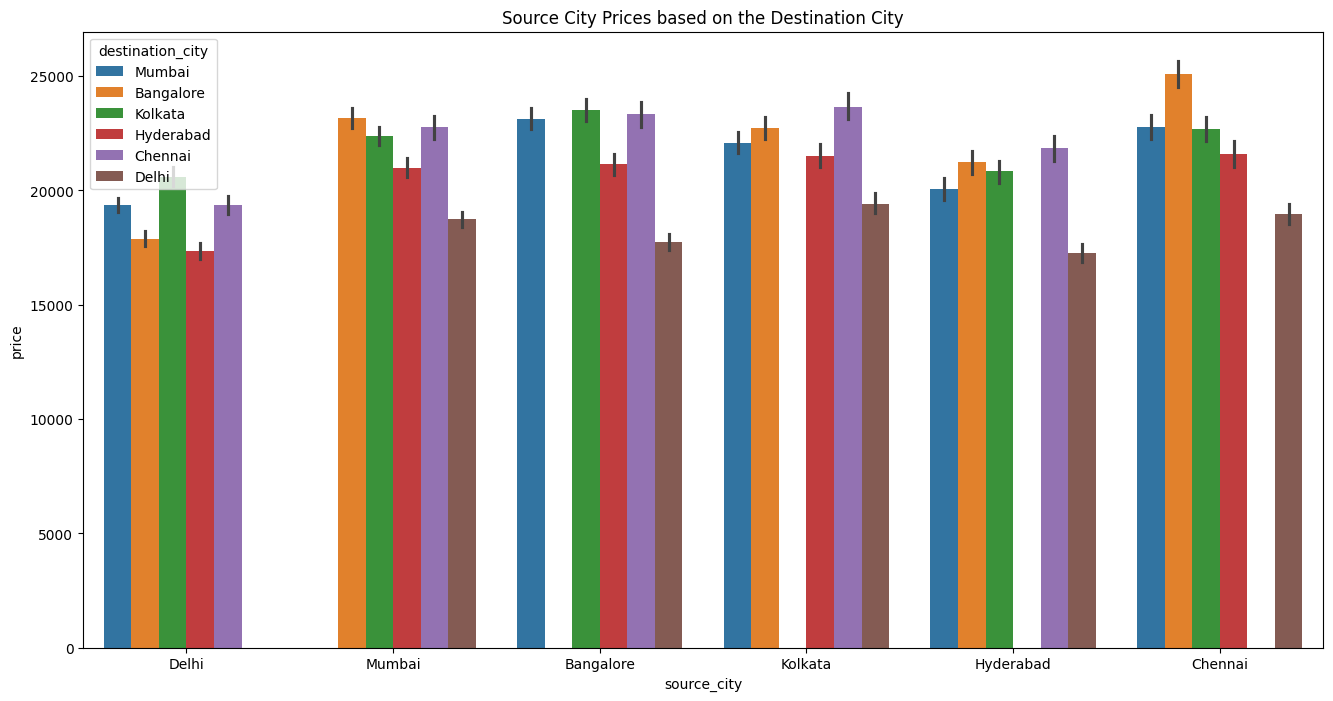

In [74]:
# source_city & destination_city
plt.figure(figsize=(16,8))
sns.barplot(data=df, x='source_city', y='price', hue='destination_city')
plt.title('Source City Prices based on the Destination City')
plt.show()

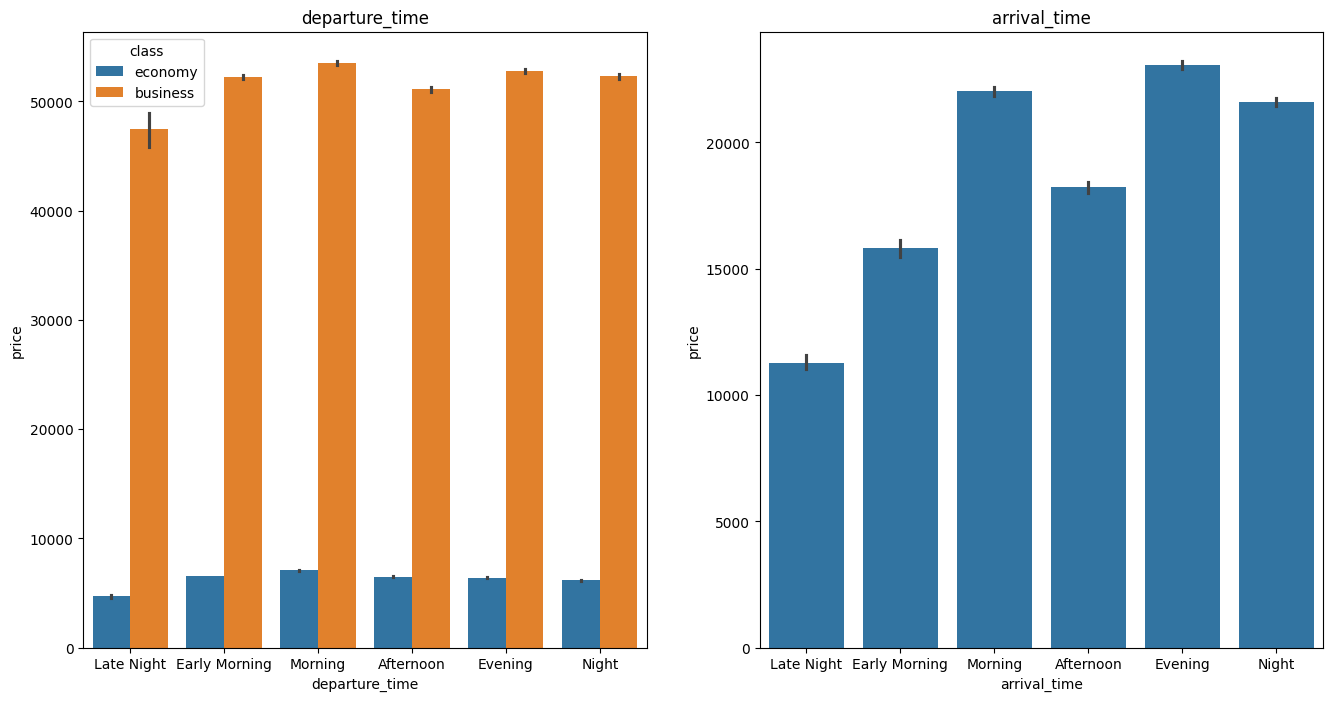

In [75]:
# departure_time & arrival_time
plt.figure(figsize=(16,8))
plt.subplot(1,2,1)
sns.barplot(data=df, y='price', x='departure_time', hue='class').set_title('departure_time')
plt.subplot(1,2,2)
sns.barplot(data=df, y='price', x='arrival_time').set_title('arrival_time')
plt.show()

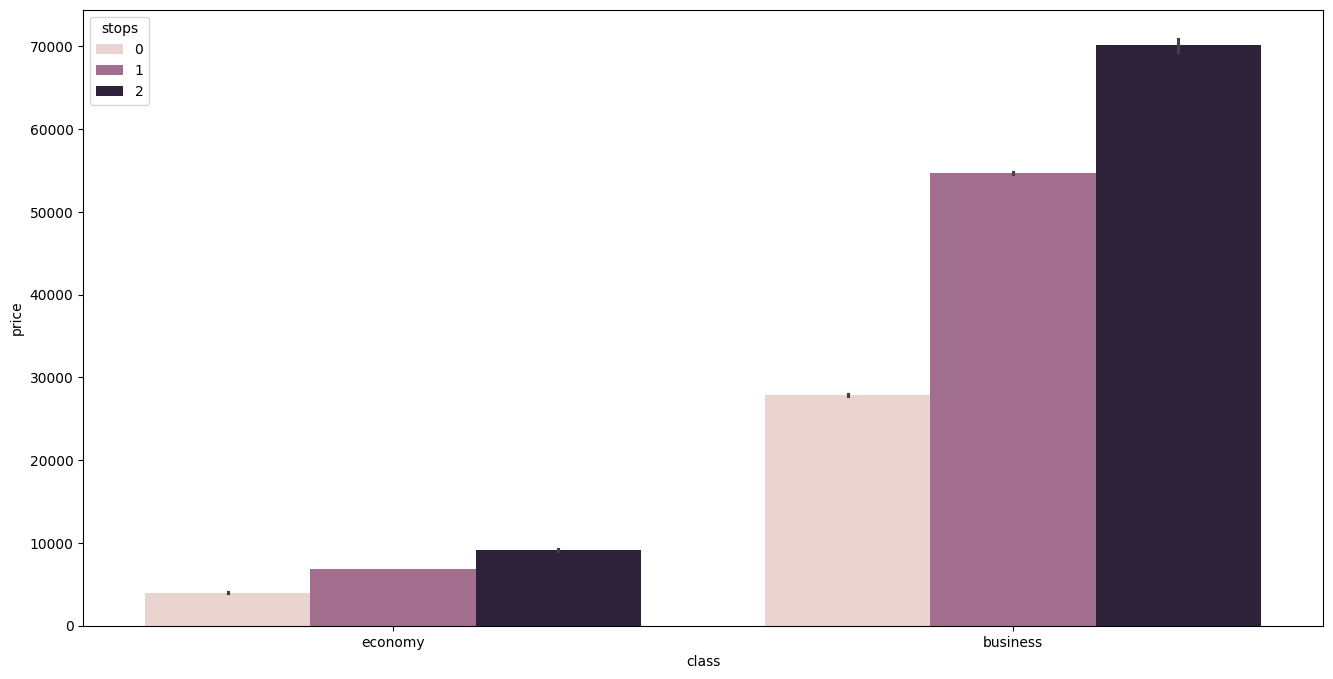

In [76]:
# stops
plt.figure(figsize=(16,8))
sns.barplot(data=df, x='class', y='price', hue='stops')
plt.show()

##### more stops = price increase 

In [77]:
df.head(1)

,airline,departure_time,source_city,duration,stops,arrival_time,destination_city,price,class,flight_code,days_left
0,SpiceJet,Evening,Delhi,2.17,0,Night,Mumbai,5953,economy,SG-8709,1


In [78]:
df['class'].unique()

array(['economy', 'business'], dtype=object)

In [79]:
import pandas as pd

pd.set_option('mode.chained_assignment', None)

df['class'] = df['class'].map({'economy': 0, 'business': 1})

print(df.head(1))

C:\Users\xResK\AppData\Local\Temp\ipykernel_12684\1655468962.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['class'] = df['class'].replace({'economy': 0, 'business': 1})


,airline,departure_time,source_city,duration,stops,arrival_time,destination_city,price,class,flight_code,days_left
0,SpiceJet,Evening,Delhi,2.17,0,Night,Mumbai,5953,0,SG-8709,1


<h3>One-Hot-Encoder (<h3>

In [80]:
df.columns

Index(['airline', 'departure_time', 'source_city', 'duration', 'stops',
       'arrival_time', 'destination_city', 'price', 'class', 'flight_code',
       'days_left'],
      dtype='object')

In [81]:
dummies_list = ['airline', 'source_city', 'destination_city', 'departure_time', 'arrival_time']
dummies = pd.get_dummies(df[dummies_list], drop_first=True)
df = pd.concat([df, dummies], axis=1)
df.head(1)

,airline,departure_time,source_city,duration,stops,arrival_time,destination_city,price,class,flight_code,...,departure_time_Early Morning,departure_time_Morning,departure_time_Afternoon,departure_time_Evening,departure_time_Night,arrival_time_Early Morning,arrival_time_Morning,arrival_time_Afternoon,arrival_time_Evening,arrival_time_Night
0,SpiceJet,Evening,Delhi,2.17,0,Night,Mumbai,5953,0,SG-8709,...,False,False,False,True,False,False,False,False,False,True


In [82]:
# drop (Data Cleaning)
df = df.drop(['flight_code', 'airline', 'source_city',
              'destination_city', 'departure_time', 'arrival_time'], axis=1)

In [83]:
df.shape

(300255, 32)

<h3>train/test split<h3>

In [84]:
x = df.drop('price', axis=1)
y = df['price']

In [85]:
df.shape, x.shape, y.shape

((300255, 32), (300255, 31), (300255,))

In [86]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=13, shuffle=True)

In [87]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((240204, 31), (60051, 31), (240204,), (60051,))

<h3>Linear Regression Model<h3>

In [88]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train, y_train) # Training
y_pred_lr = lr.predict(X_test)

print('R-Squared: ', r2_score(y_test, y_pred_lr))
print('Mean-Absolute Error: ', mean_absolute_error(y_test, y_pred_lr))
print('Mean-Squared-Error: ', mean_squared_error(y_test, y_pred_lr))

R-Squared:  0.9102153550393366
Mean-Absolute Error:  4521.904062265579
Mean-Squared-Error:  46348181.576819755


<h3>GradientBoostingRegressor<h3>

In [89]:
from sklearn.ensemble import GradientBoostingRegressor

gb_regressor = GradientBoostingRegressor()
gb_regressor.fit(X_train, y_train) # Training
y_pred_gb = gb_regressor.predict(X_test)

print('R-Squared: ', r2_score(y_test, y_pred_gb))
print('Mean-Absolute Error: ', mean_absolute_error(y_test, y_pred_gb))
print('Mean-Squared-Error: ', mean_squared_error(y_test, y_pred_gb))

R-Squared:  0.9520828407984271
Mean-Absolute Error:  2947.512209481279
Mean-Squared-Error:  24735556.912798338


<h3>DecisionTreeRegressor<h3>

In [90]:
from sklearn.tree import DecisionTreeRegressor

dt_regressor = DecisionTreeRegressor()
dt_regressor.fit(X_train, y_train) # Training
y_pred_dt = dt_regressor.predict(X_test)

print('R-Squared: ', r2_score(y_test, y_pred_dt))
print('Mean-Absolute Error: ', mean_absolute_error(y_test, y_pred_dt))
print('Mean-Squared-Error: ', mean_squared_error(y_test, y_pred_dt))

R-Squared:  0.976774336457814
Mean-Absolute Error:  1148.2082563154652
Mean-Squared-Error:  11989436.184405291


<h3>RandomForestRegressor<h3>

In [91]:
from sklearn.ensemble import RandomForestRegressor

rf_regressor = RandomForestRegressor()
rf_regressor.fit(X_train, y_train) # Training
y_pred_rf = rf_regressor.predict(X_test)

print('R-Squared: ', r2_score(y_test, y_pred_rf))
print('Mean-Absolute Error: ', mean_absolute_error(y_test, y_pred_rf))
print('Mean-Squared-Error: ', mean_squared_error(y_test, y_pred_rf))

R-Squared:  0.9854793407954806
Mean-Absolute Error:  1069.706922604146
Mean-Squared-Error:  7495782.265676313


<h3>ExtraTreeRegressor<h3>

In [92]:
from sklearn.tree import ExtraTreeRegressor

et_regressor = ExtraTreeRegressor()
et_regressor.fit(X_train, y_train) # Training
y_pred_et = et_regressor.predict(X_test)

print('R-Squared: ', r2_score(y_test, y_pred_et))
print('Mean-Absolute Error: ', mean_absolute_error(y_test, y_pred_et))
print('Mean-Squared-Error: ', mean_squared_error(y_test, y_pred_et))

R-Squared:  0.9751844861786212
Mean-Absolute Error:  1258.099293378406
Mean-Squared-Error:  12810140.765375357


<h3>Svae Model<h3>

In [93]:
import pickle
pickle.dump(rf_regressor, open('model.pkl', 'wb'))

<h3>Load Model<h3>

In [94]:
loaded_model = pickle.load(open('model.pkl', 'rb'))

In [95]:
X_train.columns

Index(['duration', 'stops', 'class', 'days_left', 'airline_AirAsia',
       'airline_GO FIRST', 'airline_Indigo', 'airline_SpiceJet',
       'airline_StarAir', 'airline_Trujet', 'airline_Vistara',
       'source_city_Chennai', 'source_city_Delhi', 'source_city_Hyderabad',
       'source_city_Kolkata', 'source_city_Mumbai', 'destination_city_Chennai',
       'destination_city_Delhi', 'destination_city_Hyderabad',
       'destination_city_Kolkata', 'destination_city_Mumbai',
       'departure_time_Early Morning', 'departure_time_Morning',
       'departure_time_Afternoon', 'departure_time_Evening',
       'departure_time_Night', 'arrival_time_Early Morning',
       'arrival_time_Morning', 'arrival_time_Afternoon',
       'arrival_time_Evening', 'arrival_time_Night'],
      dtype='object')

In [96]:
X_train[:1].values

array([[21.67, 1, 1, 20, False, False, False, False, False, False, False,
        False, False, False, True, False, False, True, False, False,
        False, False, False, False, True, False, False, False, True,
        False, False]], dtype=object)

In [97]:
import pandas as pd
import numpy as np

input_data = [21.67, 1.0, 1.0, 20.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0]

input_data_2D = np.asarray([input_data])

feature_names = ['duration', 'stops', 'class', 'days_left', 'airline_AirAsia',
                  'airline_GO FIRST', 'airline_Indigo', 'airline_SpiceJet',
                  'airline_StarAir', 'airline_Trujet', 'airline_Vistara',
                  'source_city_Chennai', 'source_city_Delhi', 'source_city_Hyderabad',
                  'source_city_Kolkata', 'source_city_Mumbai', 'destination_city_Chennai',
                  'destination_city_Delhi', 'destination_city_Hyderabad',
                  'destination_city_Kolkata', 'destination_city_Mumbai',
                  'departure_time_Early Morning', 'departure_time_Morning',
                  'departure_time_Afternoon', 'departure_time_Evening',
                  'departure_time_Night', 'arrival_time_Early Morning',
                  'arrival_time_Morning', 'arrival_time_Afternoon',
                  'arrival_time_Evening', 'arrival_time_Night']

input_data_df = pd.DataFrame(input_data_2D, columns=feature_names)

price = loaded_model.predict(input_data_df)

print(price[0])


57939.0
